In [149]:
import sklearn.discriminant_analysis as DA
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Fisher=DA.LinearDiscriminantAnalysis()

filename = "mytraining.csv"
filename2 = "mytest.csv"

!tail -800000 /data/afarbin/DLClass/HiggsML/test.csv > mytest.csv

VarNames = ["EventId","DER_mass_MMC","DER_mass_transverse_met_lep","DER_mass_vis","DER_pt_h","DER_deltaeta_jet_jet","DER_mass_jet_jet","DER_prodeta_jet_jet","DER_deltar_tau_lep","DER_pt_tot","DER_sum_pt","DER_pt_ratio_lep_tau","DER_met_phi_centrality","DER_lep_eta_centrality","PRI_tau_pt","PRI_tau_eta","PRI_tau_phi","PRI_lep_pt","PRI_lep_eta","PRI_lep_phi","PRI_met","PRI_met_phi","PRI_met_sumet","PRI_jet_num","PRI_jet_leading_pt","PRI_jet_leading_eta","PRI_jet_leading_phi","PRI_jet_subleading_pt","PRI_jet_subleading_eta","PRI_jet_subleading_phi","PRI_jet_all_pt","Weight","Label"]

df = pd.read_csv(filename,names=VarNames)
df2 = pd.read_csv(filename2,names=VarNames)


mapping = {'s': 1., 'b': 0.}
df=df.replace({'Label': mapping})


In [125]:
N_Train=50000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["Label"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["Label"]

Test_sig=Test_Sample[Test_Sample.Label==1]
Test_bkg=Test_Sample[Test_Sample.Label==0]

In [129]:
Fisher.fit(X_Train,y_Train)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

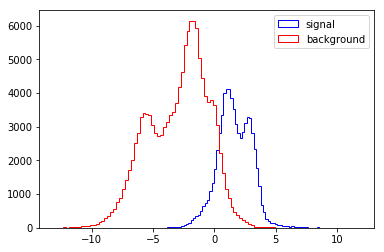

In [127]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

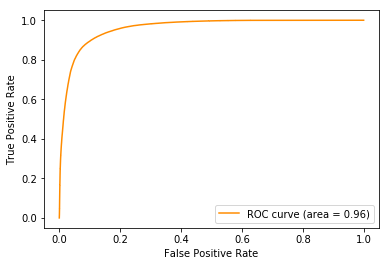

In [128]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()